<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Tomas Hidrobo &bull; 12/14/2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [21]:
# Paquetes necesarios
import io
from google.colab import files
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [9]:
# ---------- 1) CARGA DEL CSV ----------
uploaded = files.upload()  # Selecciona tu .csv limpio
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("Archivo cargado:", filename)
print("Dimensiones (filas, columnas):", df.shape)

# ---------- 2) MOSTRAR ALGUNOS DATOS ----------
print("\n--- Primeras 10 filas ---")
display(df.head(10))

print("\n--- Muestra aleatoria de 10 filas ---")
display(df.sample(10, random_state=42))

# ---------- 3) DESCRIPCIÓN DE LOS DATOS ----------
print("\n--- Información general (tipos y nulos) ---")
df.info()

print("\n--- Descripción (variables numéricas) ---")
display(df.describe().T)

print("\n--- Descripción (variables categóricas) ---")
display(df.describe(include="object").T)

# ---------- 4) ESCALADO ----------
# Selecciona columnas numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\nColumnas numéricas detectadas:")
print(num_cols)

exclude_from_scaling = ["Matchday"]

cols_to_scale = [c for c in num_cols if c not in exclude_from_scaling]

print("\nColumnas que se escalarán:")
print(cols_to_scale)

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cols_to_scale])

X_scaled_df = pd.DataFrame(X_scaled, columns=cols_to_scale, index=df.index)

print("\n--- Primeras 5 filas de datos escalados ---")
display(X_scaled_df.head())

Saving premier_league_cleaned.csv to premier_league_cleaned (2).csv
Archivo cargado: premier_league_cleaned (2).csv
Dimensiones (filas, columnas): (1049, 15)

--- Primeras 10 filas ---


,Matchday,Date,Time,Home Team,homeScore,homeXG,awayScore,awayXG,Away Team,Attendance,Referee,Stadium,Result,*Additional Stats,Attendance_cap
0,1,2022-08-05,20:00:00,Crystal Palace,0,1.2,2,1.0,Arsenal,25286.0,Anthony Taylor,Selhurst Park,A,https://fbref.com//en/matches/e62f6e78/Crystal...,25286.0
1,1,2022-08-06,12:30:00,Fulham,2,1.2,2,1.2,Liverpool,22207.0,Andy Madley,Craven Cottage,D,https://fbref.com//en/matches/6713c1dc/Fulham-...,22508.5
2,1,2022-08-06,15:00:00,Tottenham,4,1.5,1,0.5,Southampton,61732.0,Andre Marriner,Tottenham Hotspur Stadium,H,https://fbref.com//en/matches/09d8a999/Tottenh...,61732.0
3,1,2022-08-06,15:00:00,Newcastle Utd,2,1.7,0,0.3,Nott'ham Forest,52245.0,Simon Hooper,St James' Park,H,https://fbref.com//en/matches/1ac96eb4/Newcast...,52245.0
4,1,2022-08-06,15:00:00,Leeds United,2,0.8,1,1.3,Wolves,36347.0,Robert Jones,Elland Road,H,https://fbref.com//en/matches/82702941/Leeds-U...,36347.0
5,1,2022-08-06,15:00:00,Bournemouth,2,0.6,0,0.7,Aston Villa,11013.0,Peter Bankes,Vitality Stadium,H,https://fbref.com//en/matches/877e3193/Bournem...,11013.0
6,1,2022-08-06,17:30:00,Everton,0,0.7,1,1.5,Chelsea,39254.0,Craig Pawson,Goodison Park,A,https://fbref.com//en/matches/3a917cee/Everton...,39254.0
7,1,2022-08-07,14:00:00,Leicester City,2,0.6,2,0.8,Brentford,31794.0,Jarred Gillett,King Power Stadium,D,https://fbref.com//en/matches/3249ba27/Leicest...,31794.0
8,1,2022-08-07,14:00:00,Manchester Utd,1,1.4,2,1.5,Brighton,73711.0,Paul Tierney,Old Trafford,A,https://fbref.com//en/matches/8251694e/Manches...,73711.0
9,1,2022-08-07,16:30:00,West Ham,0,0.5,2,2.2,Manchester City,62443.0,Michael Oliver,London Stadium,A,https://fbref.com//en/matches/ece62baf/West-Ha...,62443.0



--- Muestra aleatoria de 10 filas ---


,Matchday,Date,Time,Home Team,homeScore,homeXG,awayScore,awayXG,Away Team,Attendance,Referee,Stadium,Result,*Additional Stats,Attendance_cap
352,36,2023-05-13,15:00:00,Manchester Utd,2,3.2,0,0.3,Wolves,73570.0,John Brooks,Old Trafford,H,https://fbref.com//en/matches/f5d61382/Manches...,73570.0
985,23,2025-01-26,14:00:00,Crystal Palace,1,1.1,2,1.3,Brentford,25066.0,Tony Harrington,Selhurst Park,A,https://fbref.com//en/matches/68d6e8fe/Crystal...,25066.0
877,12,2024-11-24,14:00:00,Southampton,2,1.3,3,3.1,Liverpool,31278.0,Samuel Barrott,St Mary's Stadium,A,https://fbref.com//en/matches/eb6f8e39/Southam...,31278.0
983,23,2025-01-25,15:00:00,Bournemouth,5,1.7,0,1.0,Nott'ham Forest,11228.0,Craig Pawson,Vitality Stadium,H,https://fbref.com//en/matches/efa8ddd7/Bournem...,11228.0
31,4,2022-08-27,15:00:00,Manchester City,4,2.2,2,0.1,Crystal Palace,53112.0,Darren England,Etihad Stadium,H,https://fbref.com//en/matches/3b9bbac7/Manches...,53112.0
448,7,2023-10-02,20:00:00,Fulham,0,1.1,2,1.7,Chelsea,24445.0,Tim Robinson,Craven Cottage,A,https://fbref.com//en/matches/c9787e60/Fulham-...,24445.0
198,21,2023-01-23,20:00:00,Fulham,0,1.0,1,0.9,Tottenham,24190.0,Paul Tierney,Craven Cottage,A,https://fbref.com//en/matches/098cd338/Fulham-...,24190.0
424,5,2023-09-16,15:00:00,Tottenham,2,2.1,1,0.7,Sheffield Utd,61706.0,Peter Bankes,Tottenham Hotspur Stadium,H,https://fbref.com//en/matches/e56e96e1/Tottenh...,61706.0
107,13,2022-10-22,15:00:00,Everton,3,1.4,0,0.9,Crystal Palace,38939.0,Simon Hooper,Goodison Park,H,https://fbref.com//en/matches/24d23a55/Everton...,38939.0
713,29,2024-04-24,20:00:00,Everton,2,1.2,0,2.1,Liverpool,38222.0,Andy Madley,Goodison Park,H,https://fbref.com//en/matches/971e0a29/Merseys...,38779.0



--- Información general (tipos y nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Matchday           1049 non-null   int64  
 1   Date               1049 non-null   object 
 2   Time               1049 non-null   object 
 3   Home Team          1049 non-null   object 
 4   homeScore          1049 non-null   int64  
 5   homeXG             1049 non-null   float64
 6   awayScore          1049 non-null   int64  
 7   awayXG             1049 non-null   float64
 8   Away Team          1049 non-null   object 
 9   Attendance         1049 non-null   float64
 10  Referee            1049 non-null   object 
 11  Stadium            1049 non-null   object 
 12  Result             1049 non-null   object 
 13  *Additional Stats  1049 non-null   object 
 14  Attendance_cap     1049 non-null   float64
dtypes: float64(4), int64(3), ob

,count,mean,std,min,25%,50%,75%,max
Matchday,1049.0,18.246902,10.512853,1.0,9.0,18.0,27.0,38.0
homeScore,1049.0,1.660629,1.364484,0.0,1.0,1.0,2.0,9.0
homeXG,1049.0,1.626787,0.878962,0.0,1.0,1.5,2.2,7.0
awayScore,1049.0,1.383222,1.237897,0.0,0.0,1.0,2.0,8.0
awayXG,1049.0,1.316206,0.781492,0.0,0.8,1.2,1.7,5.6
Attendance,1049.0,39713.988084,17042.474631,9972.0,28997.0,38198.0,53306.0,75546.0
Attendance_cap,1049.0,39687.196735,17035.829814,9972.0,29116.0,36955.0,53306.0,74081.5



--- Descripción (variables categóricas) ---


,count,unique,top,freq
Date,1049,317,2024-05-19,10
Time,1049,21,15:00:00,384
Home Team,1049,24,Crystal Palace,53
Away Team,1049,24,Arsenal,53
Referee,1049,29,Anthony Taylor,82
Stadium,1049,27,Selhurst Park,53
Result,1049,3,H,473
*Additional Stats,1049,1049,https://fbref.com//en/matches/7bab156e/Leicest...,1



Columnas numéricas detectadas:
['Matchday', 'homeScore', 'homeXG', 'awayScore', 'awayXG', 'Attendance', 'Attendance_cap']

Columnas que se escalarán:
['homeScore', 'homeXG', 'awayScore', 'awayXG', 'Attendance', 'Attendance_cap']

--- Primeras 5 filas de datos escalados ---


,homeScore,homeXG,awayScore,awayXG,Attendance,Attendance_cap
0,-1.217619,-0.485790,0.498484,-0.404811,-0.846994,-0.845751
1,0.248836,-0.485790,0.498484,-0.148768,-1.027746,-1.008867
2,1.715291,-0.144316,-0.309723,-1.044918,1.292565,1.294643
3,0.248836,0.083334,-1.117929,-1.300961,0.735632,0.737492
4,0.248836,-0.941090,-0.309723,-0.020747,-0.197659,-0.196162


---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

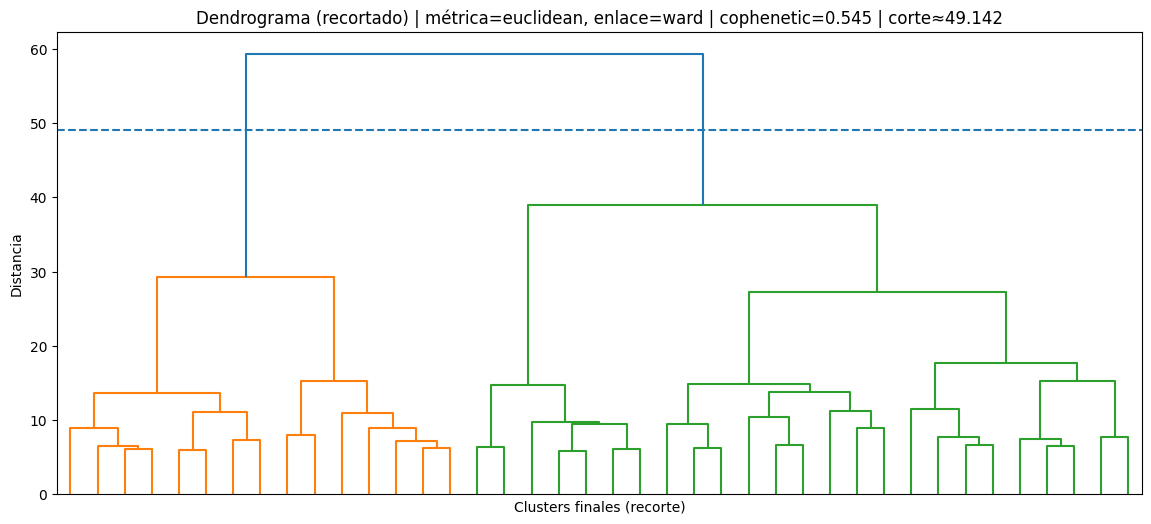

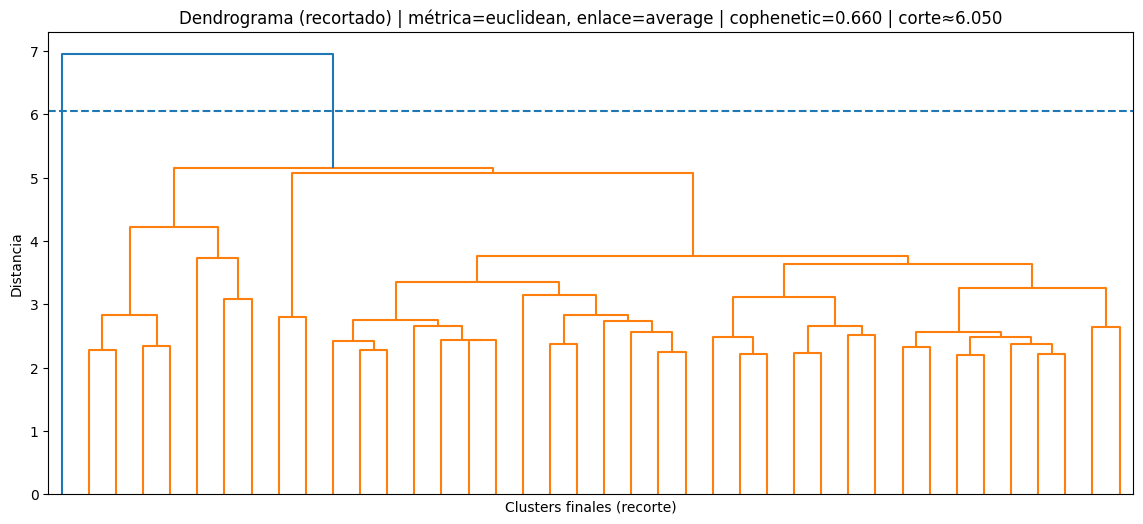

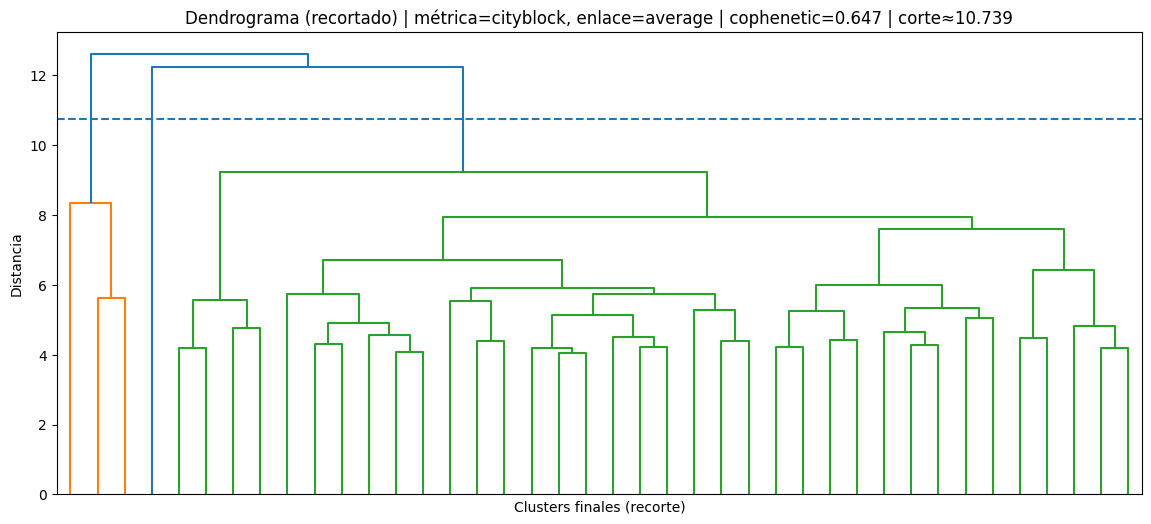

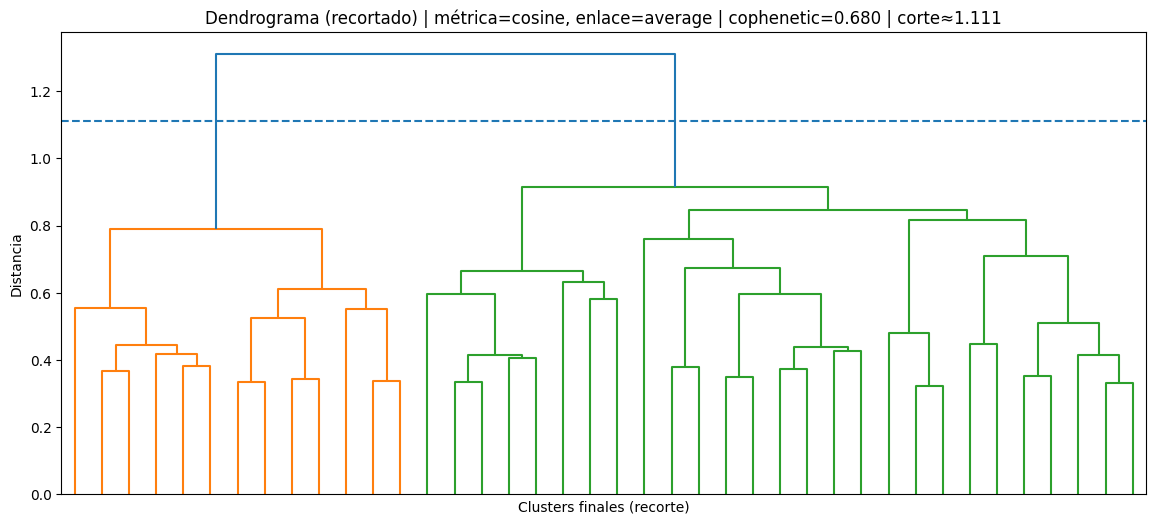

,metric,linkage,cophenetic_corr,cut_distance
3,cosine,average,0.679866,1.111188
1,euclidean,average,0.659946,6.050328
2,cityblock,average,0.647343,10.738509
0,euclidean,ward,0.545171,49.141840


Mejor configuración: {'metric': 'cosine', 'linkage': 'average', 'cophenetic_corr': np.float64(0.68)}
Distancia de corte: 1.111
Número de clusters: 2
Tamaños de clusters:
 1    425
2    624
Name: count, dtype: int64
Total asignado: 1049 | Total filas df: 1049


In [13]:
# Apartado: Genera el dendrograma de los datos (cálculo en TODO el dataset + visualización recortada)
sample_n = min(300, X_scaled.shape[0])
rng = np.random.default_rng(42)
X_plot = X_scaled[rng.choice(X_scaled.shape[0], size=sample_n, replace=False)] if X_scaled.shape[0] > sample_n else X_scaled

# Apartado: Toma una distancia de corte
def suggest_cut_distance(Z, tail_k=30):
    d = Z[:, 2]
    tail_k = min(tail_k, len(d))
    tail = d[-tail_k:]
    jumps = np.diff(tail)
    if len(jumps) == 0:
        return float(np.max(d)) * 0.7
    j = int(np.argmax(jumps))
    return float((tail[j] + tail[j + 1]) / 2)

# Apartado: Usa diferentes métricas y funciones de enlace
configs = [
    ("euclidean", "ward"),
    ("euclidean", "average"),
    ("cityblock", "average"),
    ("cosine", "average")
]

results = []
for metric, method in configs:
    if method == "ward" and metric != "euclidean":
        continue

    D_full = pdist(X_scaled, metric=metric)
    Z_full = linkage(D_full, method=method)
    coph_corr, _ = cophenet(Z_full, D_full)
    cut_d = suggest_cut_distance(Z_full, tail_k=30)
    results.append((metric, method, coph_corr, cut_d, Z_full))

    plt.figure(figsize=(14, 6))
    dendrogram(Z_full, truncate_mode="lastp", p=40, no_labels=True, color_threshold=cut_d)
    plt.axhline(y=cut_d, linestyle="--")
    plt.title(f"Dendrograma (recortado) | métrica={metric}, enlace={method} | cophenetic={coph_corr:.3f} | corte≈{cut_d:.3f}")
    plt.xlabel("Clusters finales (recorte)")
    plt.ylabel("Distancia")
    plt.show()

summary = pd.DataFrame(
    [{"metric": m, "linkage": l, "cophenetic_corr": c, "cut_distance": cd}
     for (m, l, c, cd, _) in results]
).sort_values("cophenetic_corr", ascending=False)

display(summary)

# Apartado: Toma una distancia de corte (aplicar el corte y obtener clusters para TODAS las filas)
best_i = int(np.argmax([r[2] for r in results]))
metric_best, link_best, coph_best, cut_best, Z_best = results[best_i]

labels = fcluster(Z_best, t=cut_best, criterion="distance")

print("Mejor configuración:", {"metric": metric_best, "linkage": link_best, "cophenetic_corr": round(coph_best, 3)})
print("Distancia de corte:", round(cut_best, 3))
print("Número de clusters:", len(np.unique(labels)))
print("Tamaños de clusters:\n", pd.Series(labels).value_counts().sort_index())
print("Total asignado:", len(labels), "| Total filas df:", len(df))


Elegí la métrica cosine porque compara más el “perfil” del partido que el tamaño exacto de los números; con los datos escalados, agrupa partidos que se comportan parecido. Además, fue la opción que mejor representó las distancias según la cophenetic_corr (0.68).

Tomé el corte en 1.111 porque ahí, en el dendrograma, se ve un salto grande en las uniones: antes de ese punto se juntan partidos similares, y después ya se empiezan a mezclar grupos distintos. Por eso salen 2 clusters bien definidos.



---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [14]:
# Apartado: Asigna los grupos
df_clusters = df.copy()
df_clusters["cluster"] = labels

# Apartado: Revisa la media de cada grupo
num_cols = df_clusters.select_dtypes(include=["int64", "float64"]).columns.tolist()
if "cluster" in num_cols:
    num_cols.remove("cluster")

clusters = sorted(df_clusters["cluster"].unique())

print("Media por cluster (solo variables numéricas):")
for c in clusters:
    sub = df_clusters[df_clusters["cluster"] == c]
    print("\nCLUSTER:", c, "| n =", len(sub))
    print(sub[num_cols].mean(numeric_only=True).round(3))

# Apartado: Revisa el mínimo y máximo de cada grupo
print("\nMínimo y máximo por cluster (solo variables numéricas):")
for c in clusters:
    sub = df_clusters[df_clusters["cluster"] == c]
    print("\nCLUSTER:", c, "| n =", len(sub))
    print("Mínimos:")
    print(sub[num_cols].min(numeric_only=True))
    print("Máximos:")
    print(sub[num_cols].max(numeric_only=True))

# Apartado: Muestra algunos integrantes de cada grupo
show_cols = []
for col in ["Date","Home Team","Away Team","Stadium","homeScore","awayScore","homeXG","awayXG","Attendance","Result"]:
    if col in df_clusters.columns:
        show_cols.append(col)
show_cols.append("cluster")

print("\nEjemplos de integrantes por cluster (hasta 5 filas):")
for c in clusters:
    sub = df_clusters[df_clusters["cluster"] == c]
    print("\nCLUSTER:", c)
    if len(sub) <= 5:
        display(sub[show_cols])
    else:
        display(sub[show_cols].sample(5, random_state=42))

# (Útil) Tamaño de cada cluster
print("\nTamaño por cluster:")
print(df_clusters["cluster"].value_counts().sort_index())


Media por cluster (solo variables numéricas):

CLUSTER: 1 | n = 425
Matchday             18.273
homeScore             2.306
homeXG                2.037
awayScore             1.120
awayXG                1.136
Attendance        56785.233
Attendance_cap    56784.563
dtype: float64

CLUSTER: 2 | n = 624
Matchday             18.229
homeScore             1.221
homeXG                1.347
awayScore             1.562
awayXG                1.439
Attendance        28086.938
Attendance_cap    28042.356
dtype: float64

Mínimo y máximo por cluster (solo variables numéricas):

CLUSTER: 1 | n = 425
Mínimos:
Matchday              1.0
homeScore             0.0
homeXG                0.2
awayScore             0.0
awayXG                0.0
Attendance        21478.0
Attendance_cap    21478.0
dtype: float64
Máximos:
Matchday             38.0
homeScore             9.0
homeXG                7.0
awayScore             6.0
awayXG                5.6
Attendance        75546.0
Attendance_cap    74081.5
dtype: float

,Date,Home Team,Away Team,Stadium,homeScore,awayScore,homeXG,awayXG,Attendance,Result,cluster
1029,2025-02-26,Liverpool,Newcastle Utd,Anfield,2,0,1.7,0.2,60374.0,H,1
195,2023-01-22,Manchester City,Wolves,Etihad Stadium,3,0,2.8,0.8,53282.0,H,1
444,2023-09-30,West Ham,Sheffield Utd,London Stadium,2,0,2.1,1.1,62459.0,H,1
79,2022-10-08,Manchester City,Southampton,Etihad Stadium,4,0,2.4,0.2,53365.0,H,1
887,2024-12-01,Tottenham,Fulham,Tottenham Hotspur Stadium,1,1,0.8,1.5,61141.0,D,1



CLUSTER: 2


,Date,Home Team,Away Team,Stadium,homeScore,awayScore,homeXG,awayXG,Attendance,Result,cluster
754,2024-05-19,Brighton,Manchester Utd,The American Express Community Stadium,0,2,1.7,1.3,31662.0,A,2
836,2024-10-19,Bournemouth,Arsenal,Vitality Stadium,2,0,1.8,0.7,11235.0,H,2
351,2023-05-13,Southampton,Fulham,St. Mary's Stadium,0,2,0.4,1.4,28978.0,A,2
348,2023-05-13,Aston Villa,Tottenham,Villa Park,2,1,1.2,1.4,42164.0,H,2
808,2024-09-22,Brighton,Nott'ham Forest,The American Express Stadium,2,2,1.0,1.4,31444.0,D,2



Tamaño por cluster:
cluster
1    425
2    624
Name: count, dtype: int64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

Cluster 1 agrupa partidos principalmente por alta asistencia (estadios grandes) y con tendencia a mayor producción ofensiva del equipo local (más goles y mayor xG del local).

Cluster 2 agrupa partidos con asistencia más baja (estadios más pequeños/aforo menor) y con resultados más equilibrados o ligeramente inclinados al visitante (awayScore y awayXG algo mayores en promedio).

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

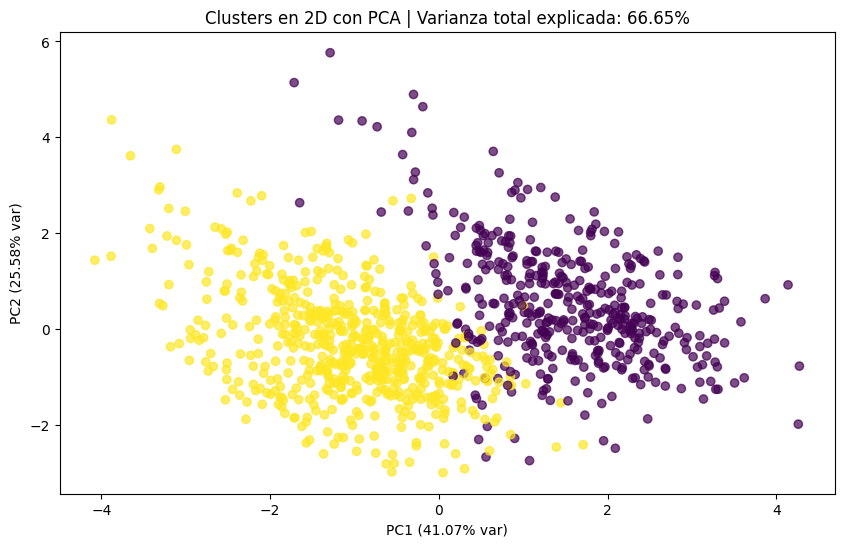

Varianza explicada PC1: 41.07%
Varianza explicada PC2: 25.58%
Varianza total explicada en 2D: 66.65%
Silhouette score (aprox): 0.285


In [18]:
# Apartado: Visualización 2D de los grupos
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

var_exp = pca.explained_variance_ratio_
var_exp_2d = var_exp.sum() * 100

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.7)
plt.xlabel(f"PC1 ({var_exp[0]*100:.2f}% var)")
plt.ylabel(f"PC2 ({var_exp[1]*100:.2f}% var)")
plt.title(f"Clusters en 2D con PCA | Varianza total explicada: {var_exp_2d:.2f}%")
plt.show()

print(f"Varianza explicada PC1: {var_exp[0]*100:.2f}%")
print(f"Varianza explicada PC2: {var_exp[1]*100:.2f}%")
print(f"Varianza total explicada en 2D: {var_exp_2d:.2f}%")

# Apartado: ¿Qué tan buenos te parecen los grupos? (métrica simple)
# Silhouette requiere distancias; para clustering jerárquico usamos silhouette sobre X_scaled
from sklearn.metrics import silhouette_score
sil = silhouette_score(X_scaled, labels)
print(f"Silhouette score (aprox): {sil:.3f}")


Para mí los grupos son “buenos” si en el gráfico 2D se nota que los puntos de un cluster tienden a quedarse juntos y no se mezclan demasiado con los del otro. Si en cambio los colores aparecen muy revueltos, entonces la separación no es tan clara en 2D, aunque eso no significa automáticamente que el clustering esté mal, solo que en dos dimensiones no se ve tan bien.

El porcentaje de varianza explicada indica cuánta información real de los datos está mostrando el gráfico. Si ese porcentaje es alto, el dibujo en 2D representa bastante bien la estructura y lo que veo en pantalla es confiable para juzgar la separación. Si el porcentaje es bajo, el gráfico puede “aplanar” la información y hacer que los clusters parezcan más mezclados de lo que realmente están en el espacio completo. En ese caso, la visualización sirve como referencia general, pero no como evidencia definitiva de que los grupos sean buenos o malos.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [19]:
# Ejercicio: Métrica de la silueta para los grupos obtenidos

from sklearn.metrics import silhouette_score

sil = silhouette_score(X_scaled, labels)
print("Silhouette score:", round(sil, 3))


Silhouette score: 0.285


Con un silhouette score de 0.285, los grupos quedaron “más o menos”. Sí hay cierta separación, pero no es súper clara: hay bastantes partidos que podrían caer en cualquiera de los dos grupos porque están medio mezclados en el espacio de variables

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

In [22]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

# Apartado: Agrupamiento jerárquico con diferentes parámetros + silueta + mejor opción
configs = [
    ("euclidean", "ward"),
    ("euclidean", "average"),
    ("cityblock", "average"),
    ("cosine", "average")
]

k_values = [2, 3, 4, 5, 6]

rows = []

for metric, method in configs:
    if method == "ward" and metric != "euclidean":
        continue

    D = pdist(X_scaled, metric=metric)
    Z = linkage(D, method=method)

    for k in k_values:
        labels_k = fcluster(Z, t=k, criterion="maxclust")

        # Silhouette requiere al menos 2 clusters y que no sea todo un solo cluster
        n_clusters = len(np.unique(labels_k))
        if n_clusters < 2 or n_clusters >= len(labels_k):
            continue

        sil = silhouette_score(X_scaled, labels_k)

        rows.append({
            "metric": metric,
            "linkage": method,
            "k": k,
            "n_clusters": n_clusters,
            "silhouette": sil
        })

results_df = pd.DataFrame(rows).sort_values("silhouette", ascending=False)
display(results_df)

best = results_df.iloc[0]
print("Mejor configuración:",
      {"metric": best["metric"], "linkage": best["linkage"], "k": int(best["k"]),
       "silhouette": round(float(best["silhouette"]), 3)})


,metric,linkage,k,n_clusters,silhouette
5,euclidean,average,2,2,0.517215
10,cityblock,average,2,2,0.507680
11,cityblock,average,3,3,0.448989
6,euclidean,average,3,3,0.347108
15,cosine,average,2,2,0.284811
0,euclidean,ward,2,2,0.281735
1,euclidean,ward,3,3,0.269796
7,euclidean,average,4,4,0.267614
12,cityblock,average,4,4,0.262353
13,cityblock,average,5,5,0.258122


Mejor configuración: {'metric': 'euclidean', 'linkage': 'average', 'k': 2, 'silhouette': 0.517}
